# First look at invariant mass

## Imports and definitions

In [4]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

Welcome to JupyROOT 6.26/06
Loaded bin migration and acceptance weights from MC calculations.


## (1) Load data

### (1.1) Load data file

In [137]:
data_path  = "/Users/erezcohen/Desktop/data/CLAS12/RGB/BranchingRatios/sidisdvcs"
subdirname = "sidisdvcs_20Dec2024_commit_b85822a" 
run        = 6164
filename   = "skimmed_BranchingRatios_sidisdvcs_%06d_eep2gX.csv"%run
fullfile   = data_path + "/" + subdirname + "/" + filename
data = pd.read_csv(fullfile)
print('Loaded %dk events from %s run %d'%(len(data)/1000,subdirname,run))

Loaded 153k events from sidisdvcs_20Dec2024_commit_b85822a run 6164


### (1.2) Add cuts not previously imposed

1. $E(\gamma_1) > 10$ MeV and $E(\gamma_2) > 10$ MeV,
2. $\theta(\gamma_1)$ > 5$^\circ$, $\theta(\gamma_2)$ > 5$^\circ$

In [138]:
Eg_min = 0.0100
data_after_cuts = data[(data["g1_E"]>Eg_min) & (data["g2_E"]>Eg_min)]

abs_Theta_g_min = 5 * 3.14/180.
data_after_cuts = data_after_cuts[(data_after_cuts["g1_Theta"]>abs_Theta_g_min) & (data_after_cuts["g2_Theta"]>abs_Theta_g_min)]
print('Retained %dk events'%(len(data_after_cuts)/1000))

Retained 107k events


## (2) Plot distirbution of invariant mass of the two $\gamma$

In [139]:
M_pi  = 0.139
M_eta = 0.548
M_rho = 0.770

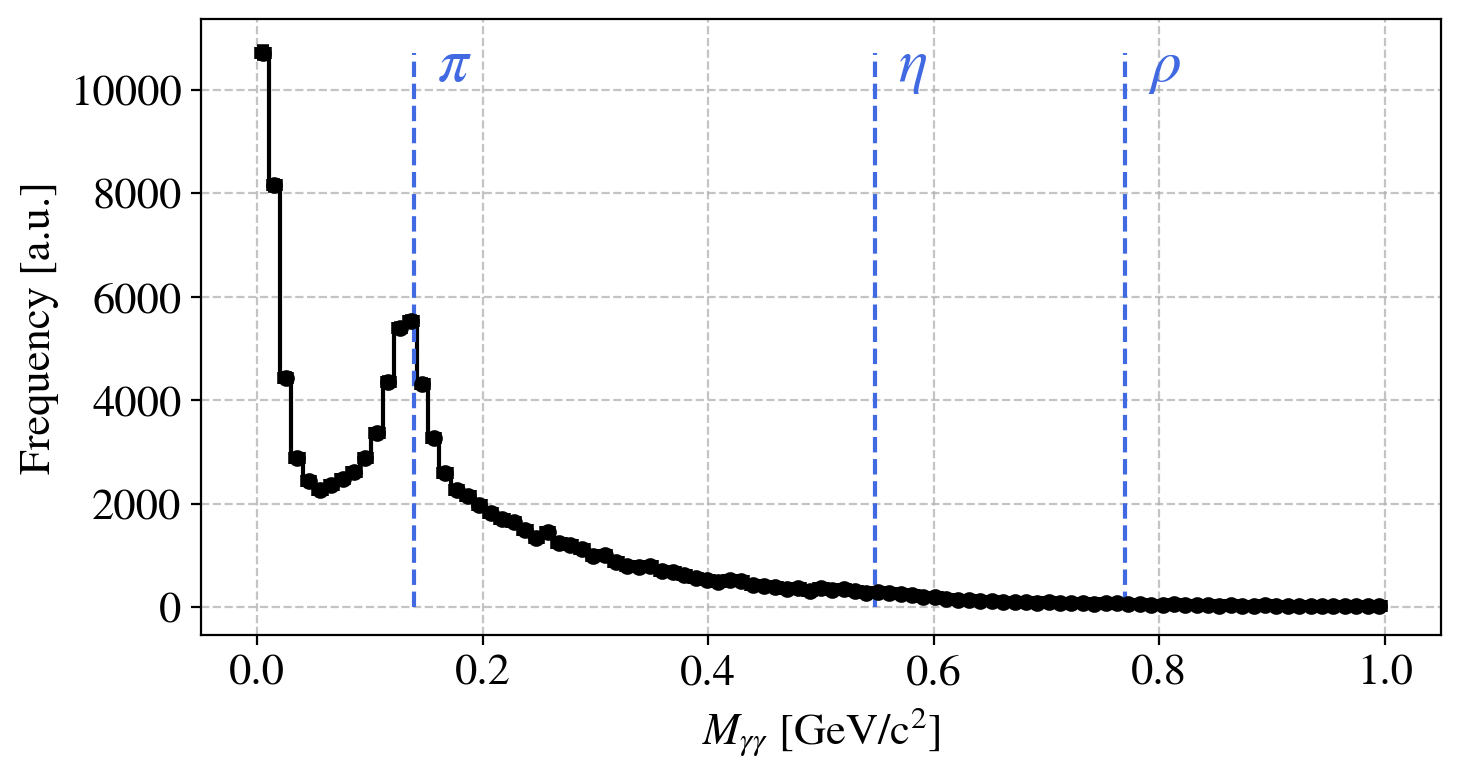

In [141]:
var = "Mgg"
x = data_after_cuts[var]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
h = plot_step_hist(x,bins=np.linspace(0,1,100));
ymax = np.max(h)
for resname,M_res in zip(['\\pi','\\eta','\\rho'],[M_pi,M_eta,M_rho]):
    plt.vlines(M_res, 0,ymax,linestyles='--',colors='royalblue');
    plt.text(M_res+0.02,0.95*ymax,"$"+resname+"$",color='royalblue',fontsize=22)
set_axes(ax,'$M_{\gamma\gamma}$ [GeV/c$^2$]','Frequency [a.u.]',fontsize=16,do_add_grid=True);

## (3) Add a kinematic cut to clean up events?

### (3.1) Missing mass of the $(e,e'p2\gamma)$ reaction

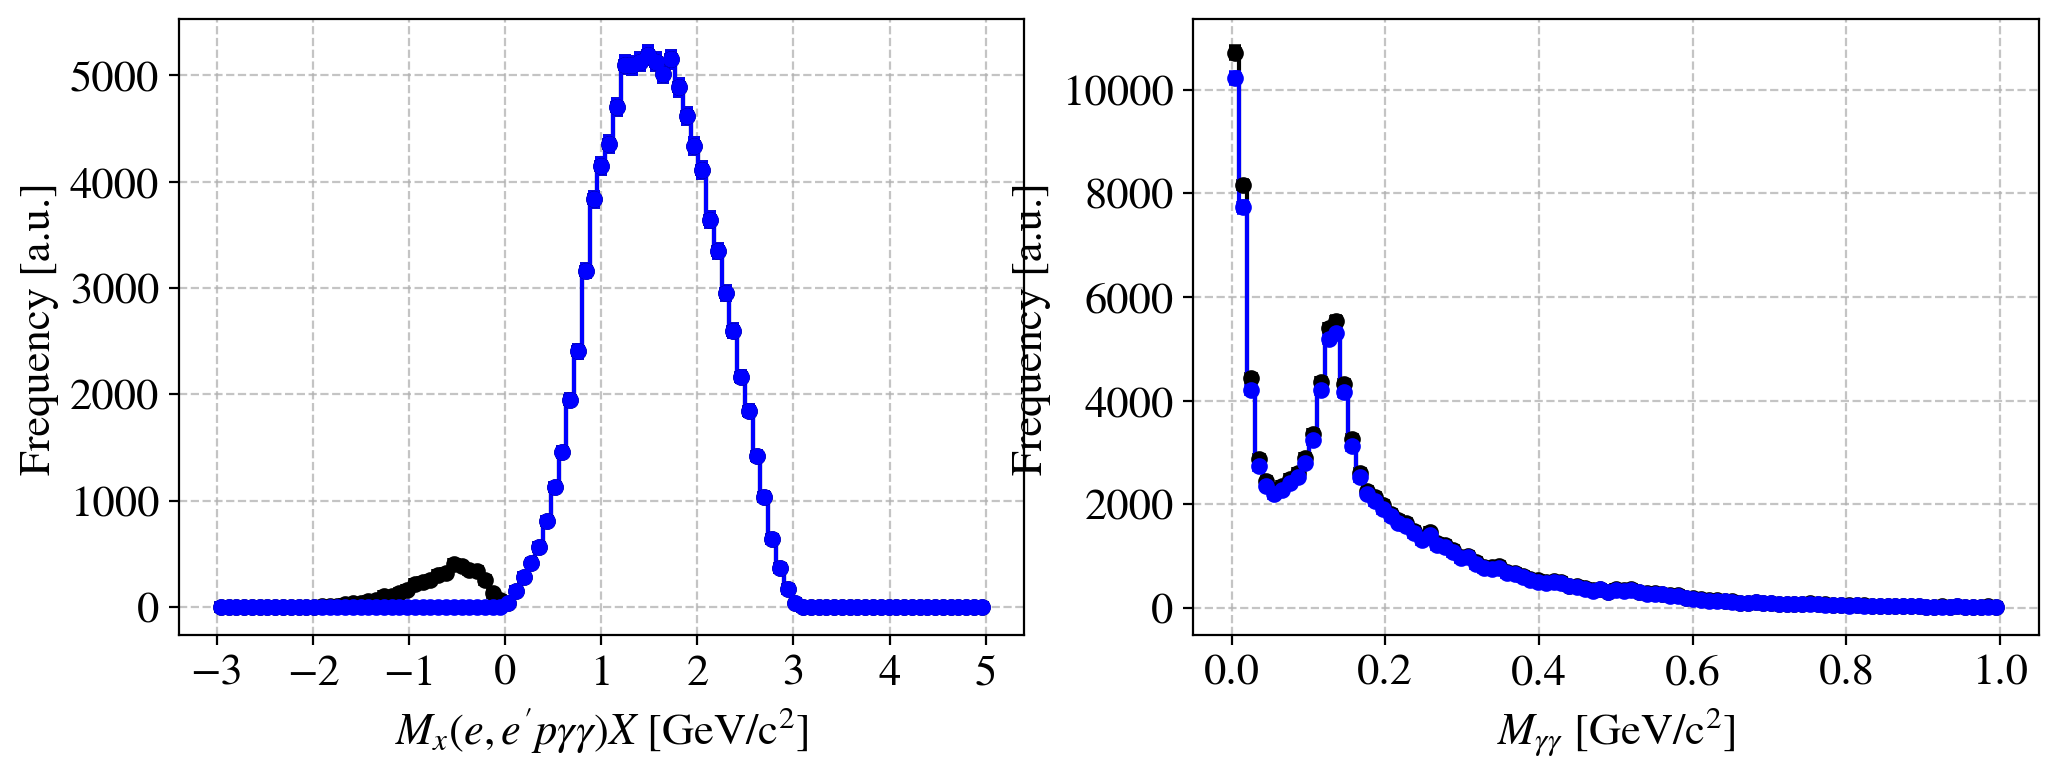

In [147]:
var = "M_x_peep"
x = data_after_cuts[var]
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
h = plot_step_hist(x,bins=np.linspace(-3,5,100));
set_axes(ax,"$M_x(e,e'p\gamma\gamma)X$ [GeV/c$^2$]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);
var_min = 0
h = plot_step_hist(x[x>var_min],bins=np.linspace(-3,5,100),color='blue');


data_sliced = data_after_cuts[data_after_cuts[var] > var_min]
var = "Mgg"
ax = fig.add_subplot(1,2,2)
h = plot_step_hist(data_after_cuts[var], bins=np.linspace(0,1,100),color='k');
h = plot_step_hist(data_sliced[var],     bins=np.linspace(0,1,100),color='blue');
set_axes(ax,'$M_{\gamma\gamma}$ [GeV/c$^2$]','Frequency [a.u.]',fontsize=16,do_add_grid=True);

### (3...) Energy and momentum transfer

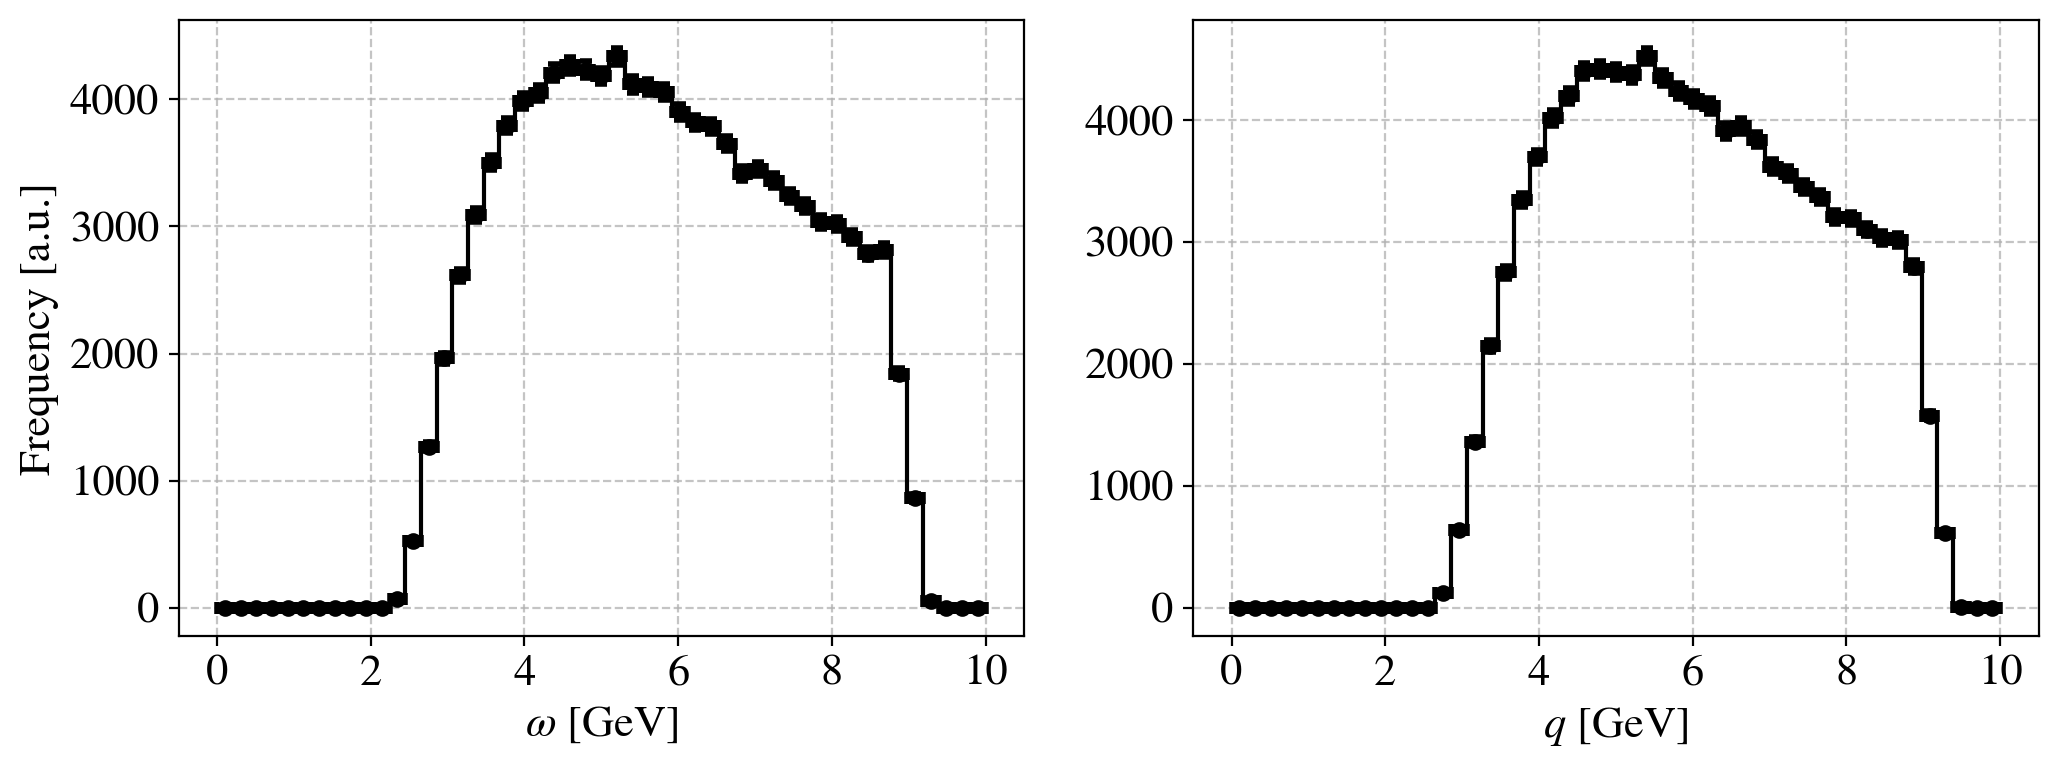

In [148]:
var = "omega"
x = data_after_cuts[var]
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
h = plot_step_hist(x,bins=np.linspace(0,10,50));
set_axes(ax,"$\omega$ [GeV]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "q"
x = data_after_cuts[var]
ax = fig.add_subplot(1,2,2)
h = plot_step_hist(x,bins=np.linspace(0,10,50));
set_axes(ax,"$q$ [GeV]",'',fontsize=16,do_add_grid=True);

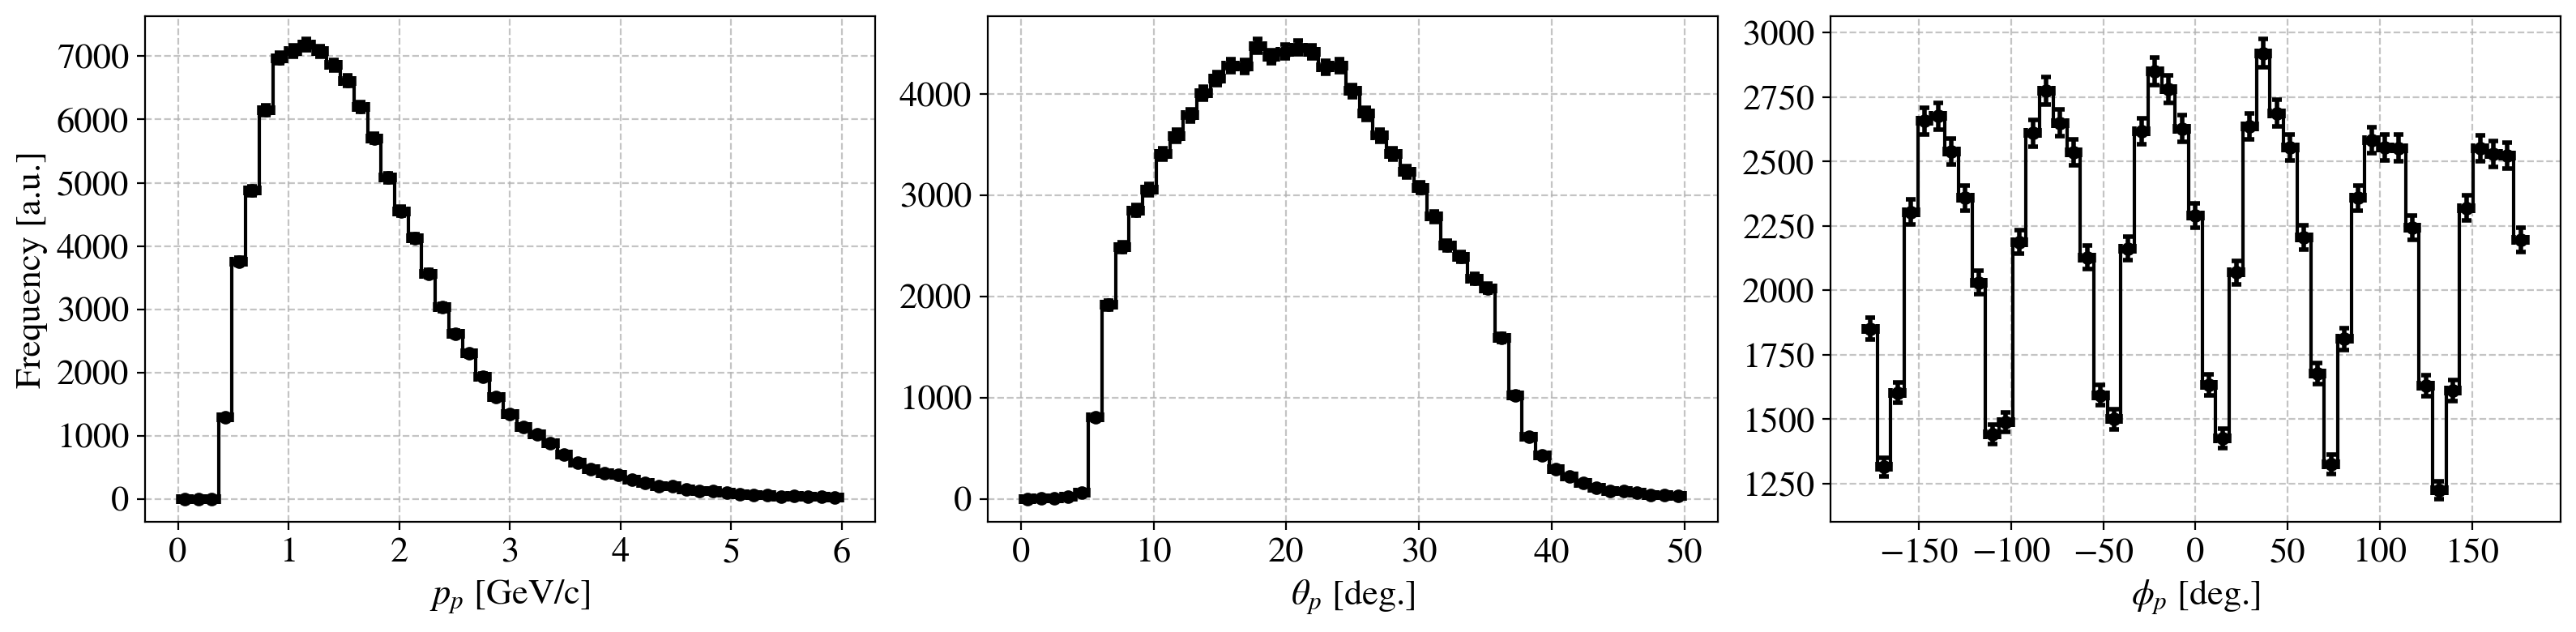

In [149]:
fig = plt.figure(figsize=(16,4),tight_layout=True)

var = "p_P"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,1)
h = plot_step_hist(x,bins=np.linspace(0,6,50));
set_axes(ax,"$p_p$ [GeV/c]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "p_Theta"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(1,3,2)
h = plot_step_hist(x,bins=np.linspace(0,50,50));
set_axes(ax,"$\\theta_p$ [deg.]",'',fontsize=16,do_add_grid=True);

var = "p_Phi"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(1,3,3)
h = plot_step_hist(x,bins=np.linspace(-180,180,50));
set_axes(ax,"$\phi_p$ [deg.]",'',fontsize=16,do_add_grid=True);

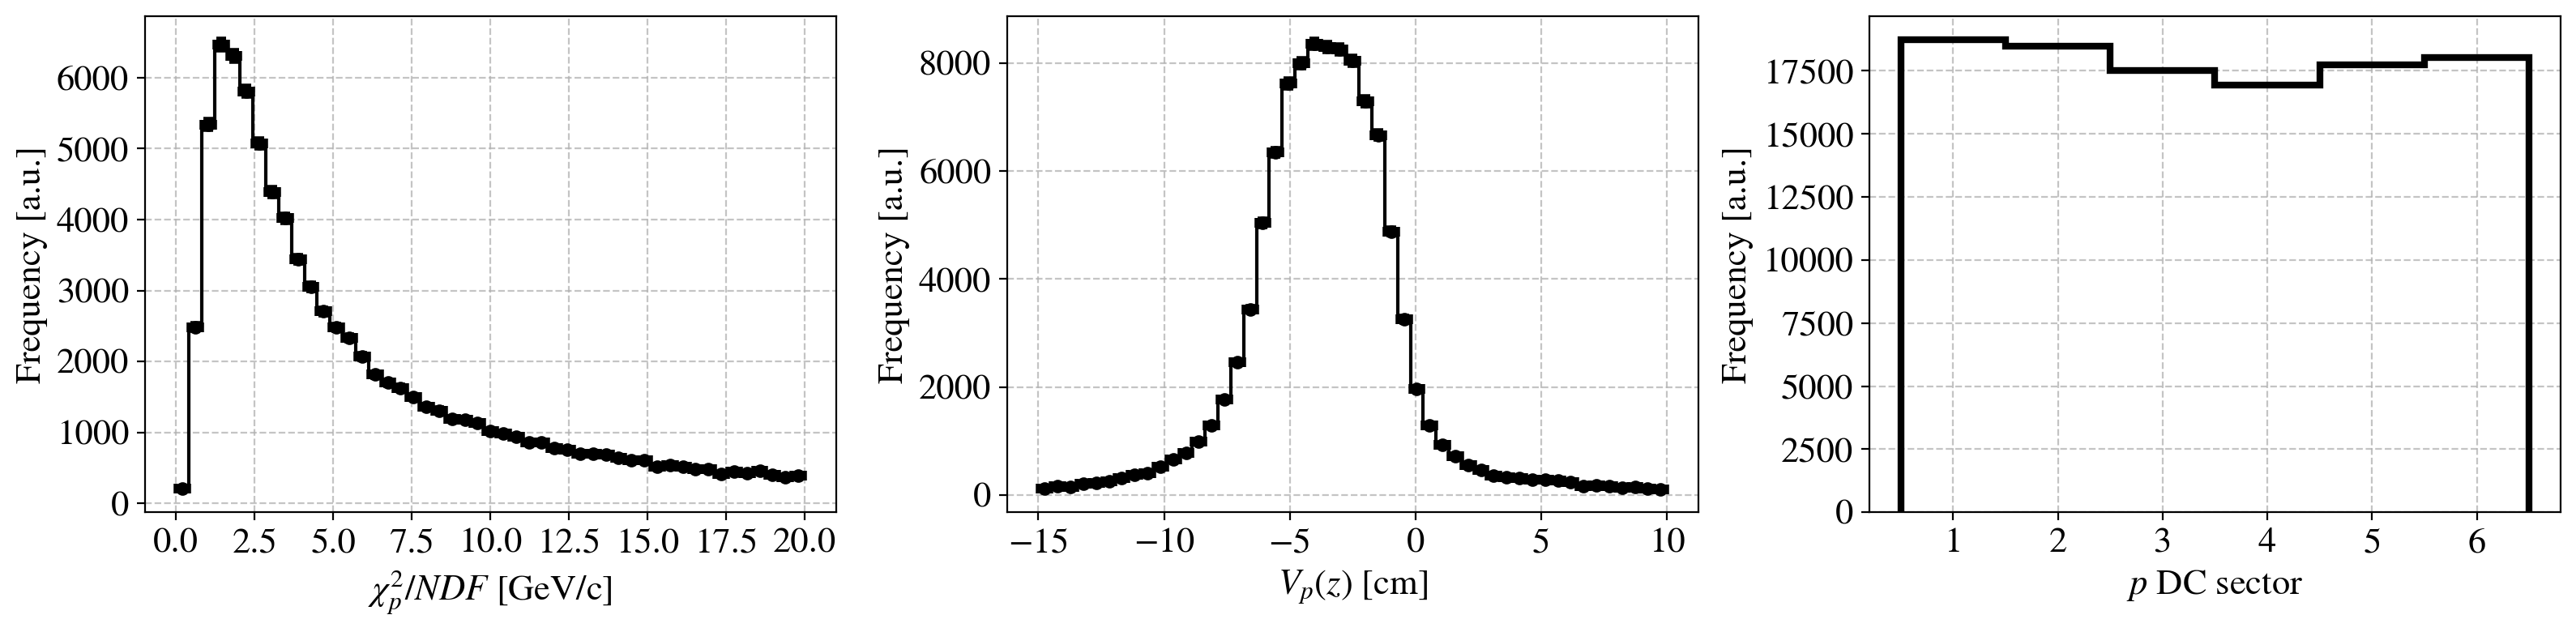

In [150]:
fig = plt.figure(figsize=(16,4),tight_layout=True)

var = "p_DC_Chi2N"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,1)
h = plot_step_hist(x,bins=np.linspace(0,20,50));
set_axes(ax,"$\chi^2_p/NDF$ [GeV/c]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "p_Vz"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,2)
h = plot_step_hist(x,bins=np.linspace(-15,10,50));
set_axes(ax,"$V_p(z)$ [cm]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "p_DC_sector"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,3)
h = plot_discrete_histogram(x);
set_axes(ax,"$p$ DC sector",'Frequency [a.u.]',fontsize=16,do_add_grid=True);



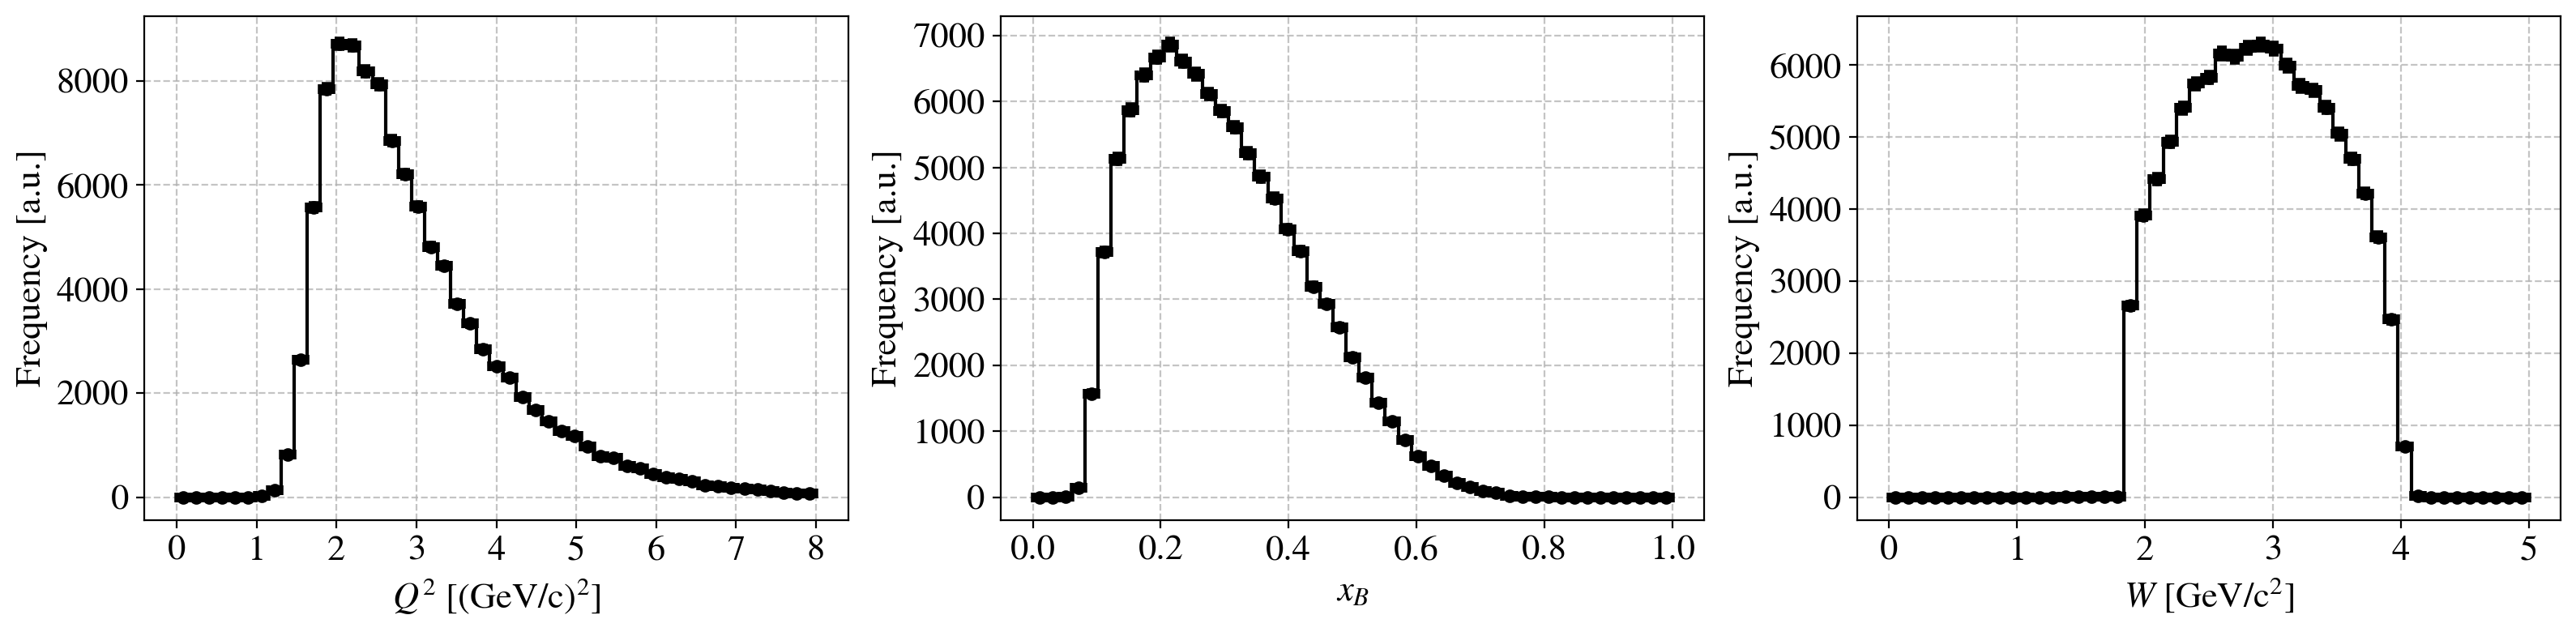

In [151]:
fig = plt.figure(figsize=(16,4),tight_layout=True)

var = "Q2"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,1)
h = plot_step_hist(x,bins=np.linspace(0,8,50));
set_axes(ax,"$Q^2$ [(GeV/c)$^2$]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "xB"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,2)
h = plot_step_hist(x,bins=np.linspace(0,1,50));
set_axes(ax,"$x_B$",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "W"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,3)
h = plot_step_hist(x,bins=np.linspace(0,5,50));
set_axes(ax,"$W$ [GeV/c$^2$]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);


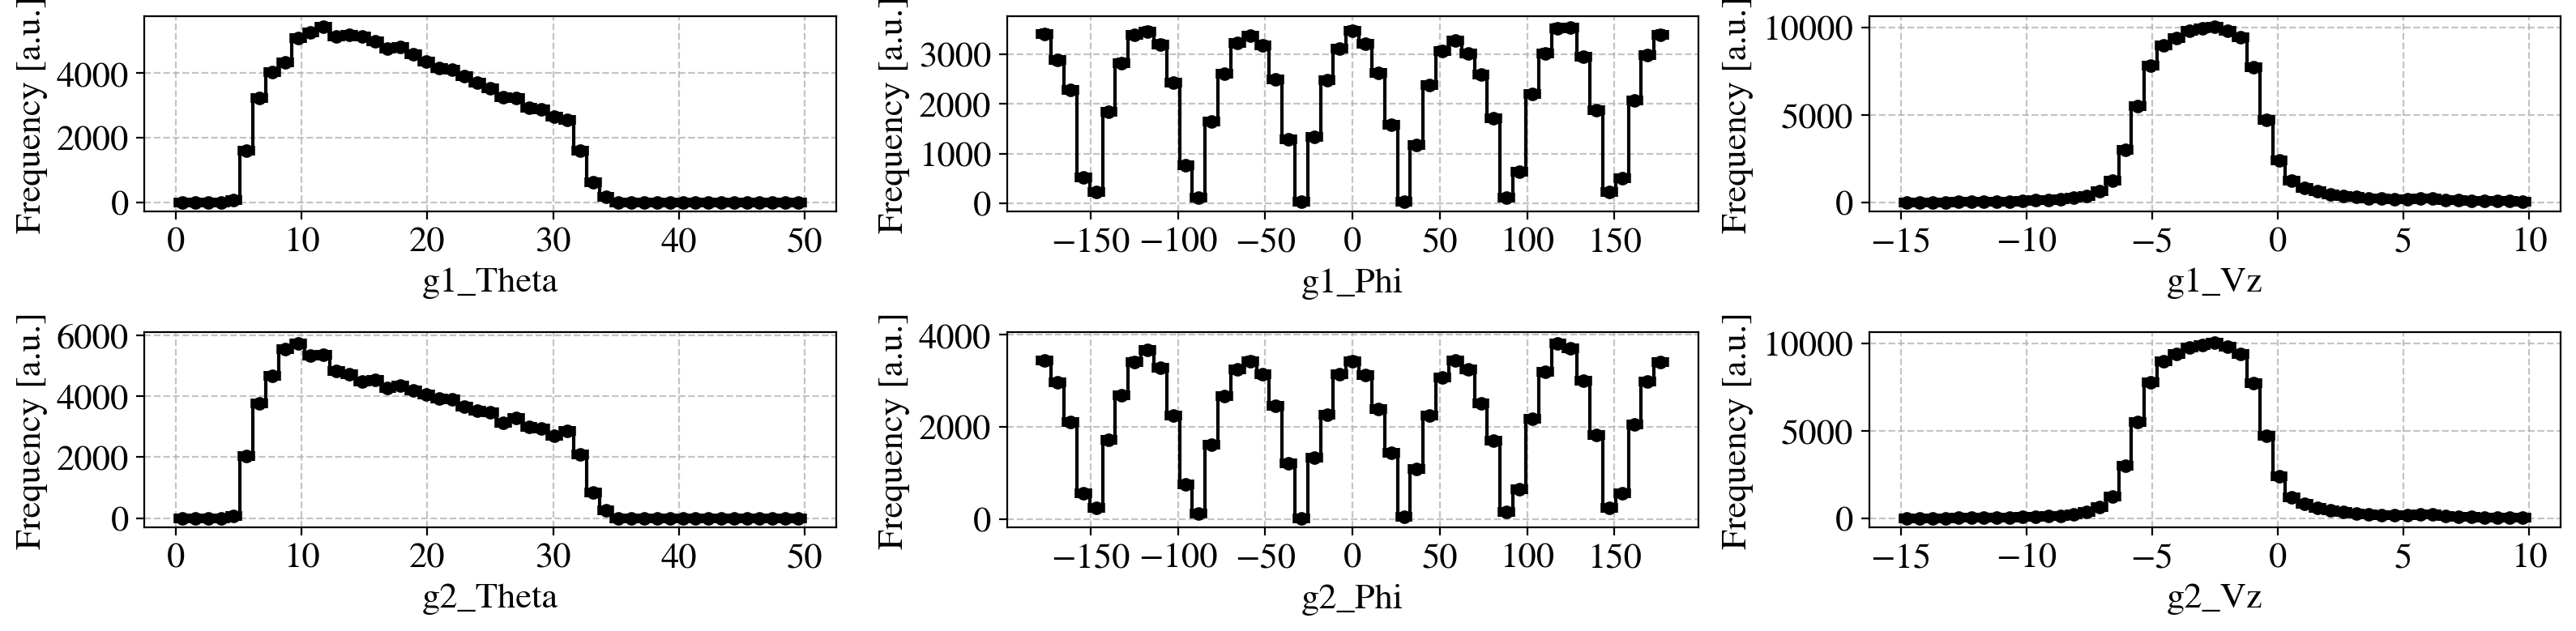

In [152]:
fig = plt.figure(figsize=(16,4),tight_layout=True)

var = "g1_Theta"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(2,3,1)
h = plot_step_hist(x,bins=np.linspace(0,50,50));
set_axes(ax,"g1_Theta",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g1_Phi"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(2,3,2)
h = plot_step_hist(x,bins=np.linspace(-180,180,50));
set_axes(ax,"g1_Phi",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g1_Vz"
x = data_after_cuts[var]
ax = fig.add_subplot(2,3,3)
h = plot_step_hist(x,bins=np.linspace(-15,10,50));
set_axes(ax,"g1_Vz",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g2_Theta"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(2,3,4)
h = plot_step_hist(x,bins=np.linspace(0,50,50));
set_axes(ax,"g2_Theta",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g2_Phi"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(2,3,5)
h = plot_step_hist(x,bins=np.linspace(-180,180,50));
set_axes(ax,"g2_Phi",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g2_Vz"
x = data_after_cuts[var]
ax = fig.add_subplot(2,3,6)
h = plot_step_hist(x,bins=np.linspace(-15,10,50));
set_axes(ax,"g2_Vz",'Frequency [a.u.]',fontsize=16,do_add_grid=True);



In [170]:
# np.max(data_after_cuts["g2_E_EC"])
data["g1_E_EC"][1:]

1         0
2         0
3         0
4         0
5         0
         ..
153344    0
153345    0
153346    0
153347    0
153348    0
Name: g1_E_EC, Length: 153348, dtype: int64

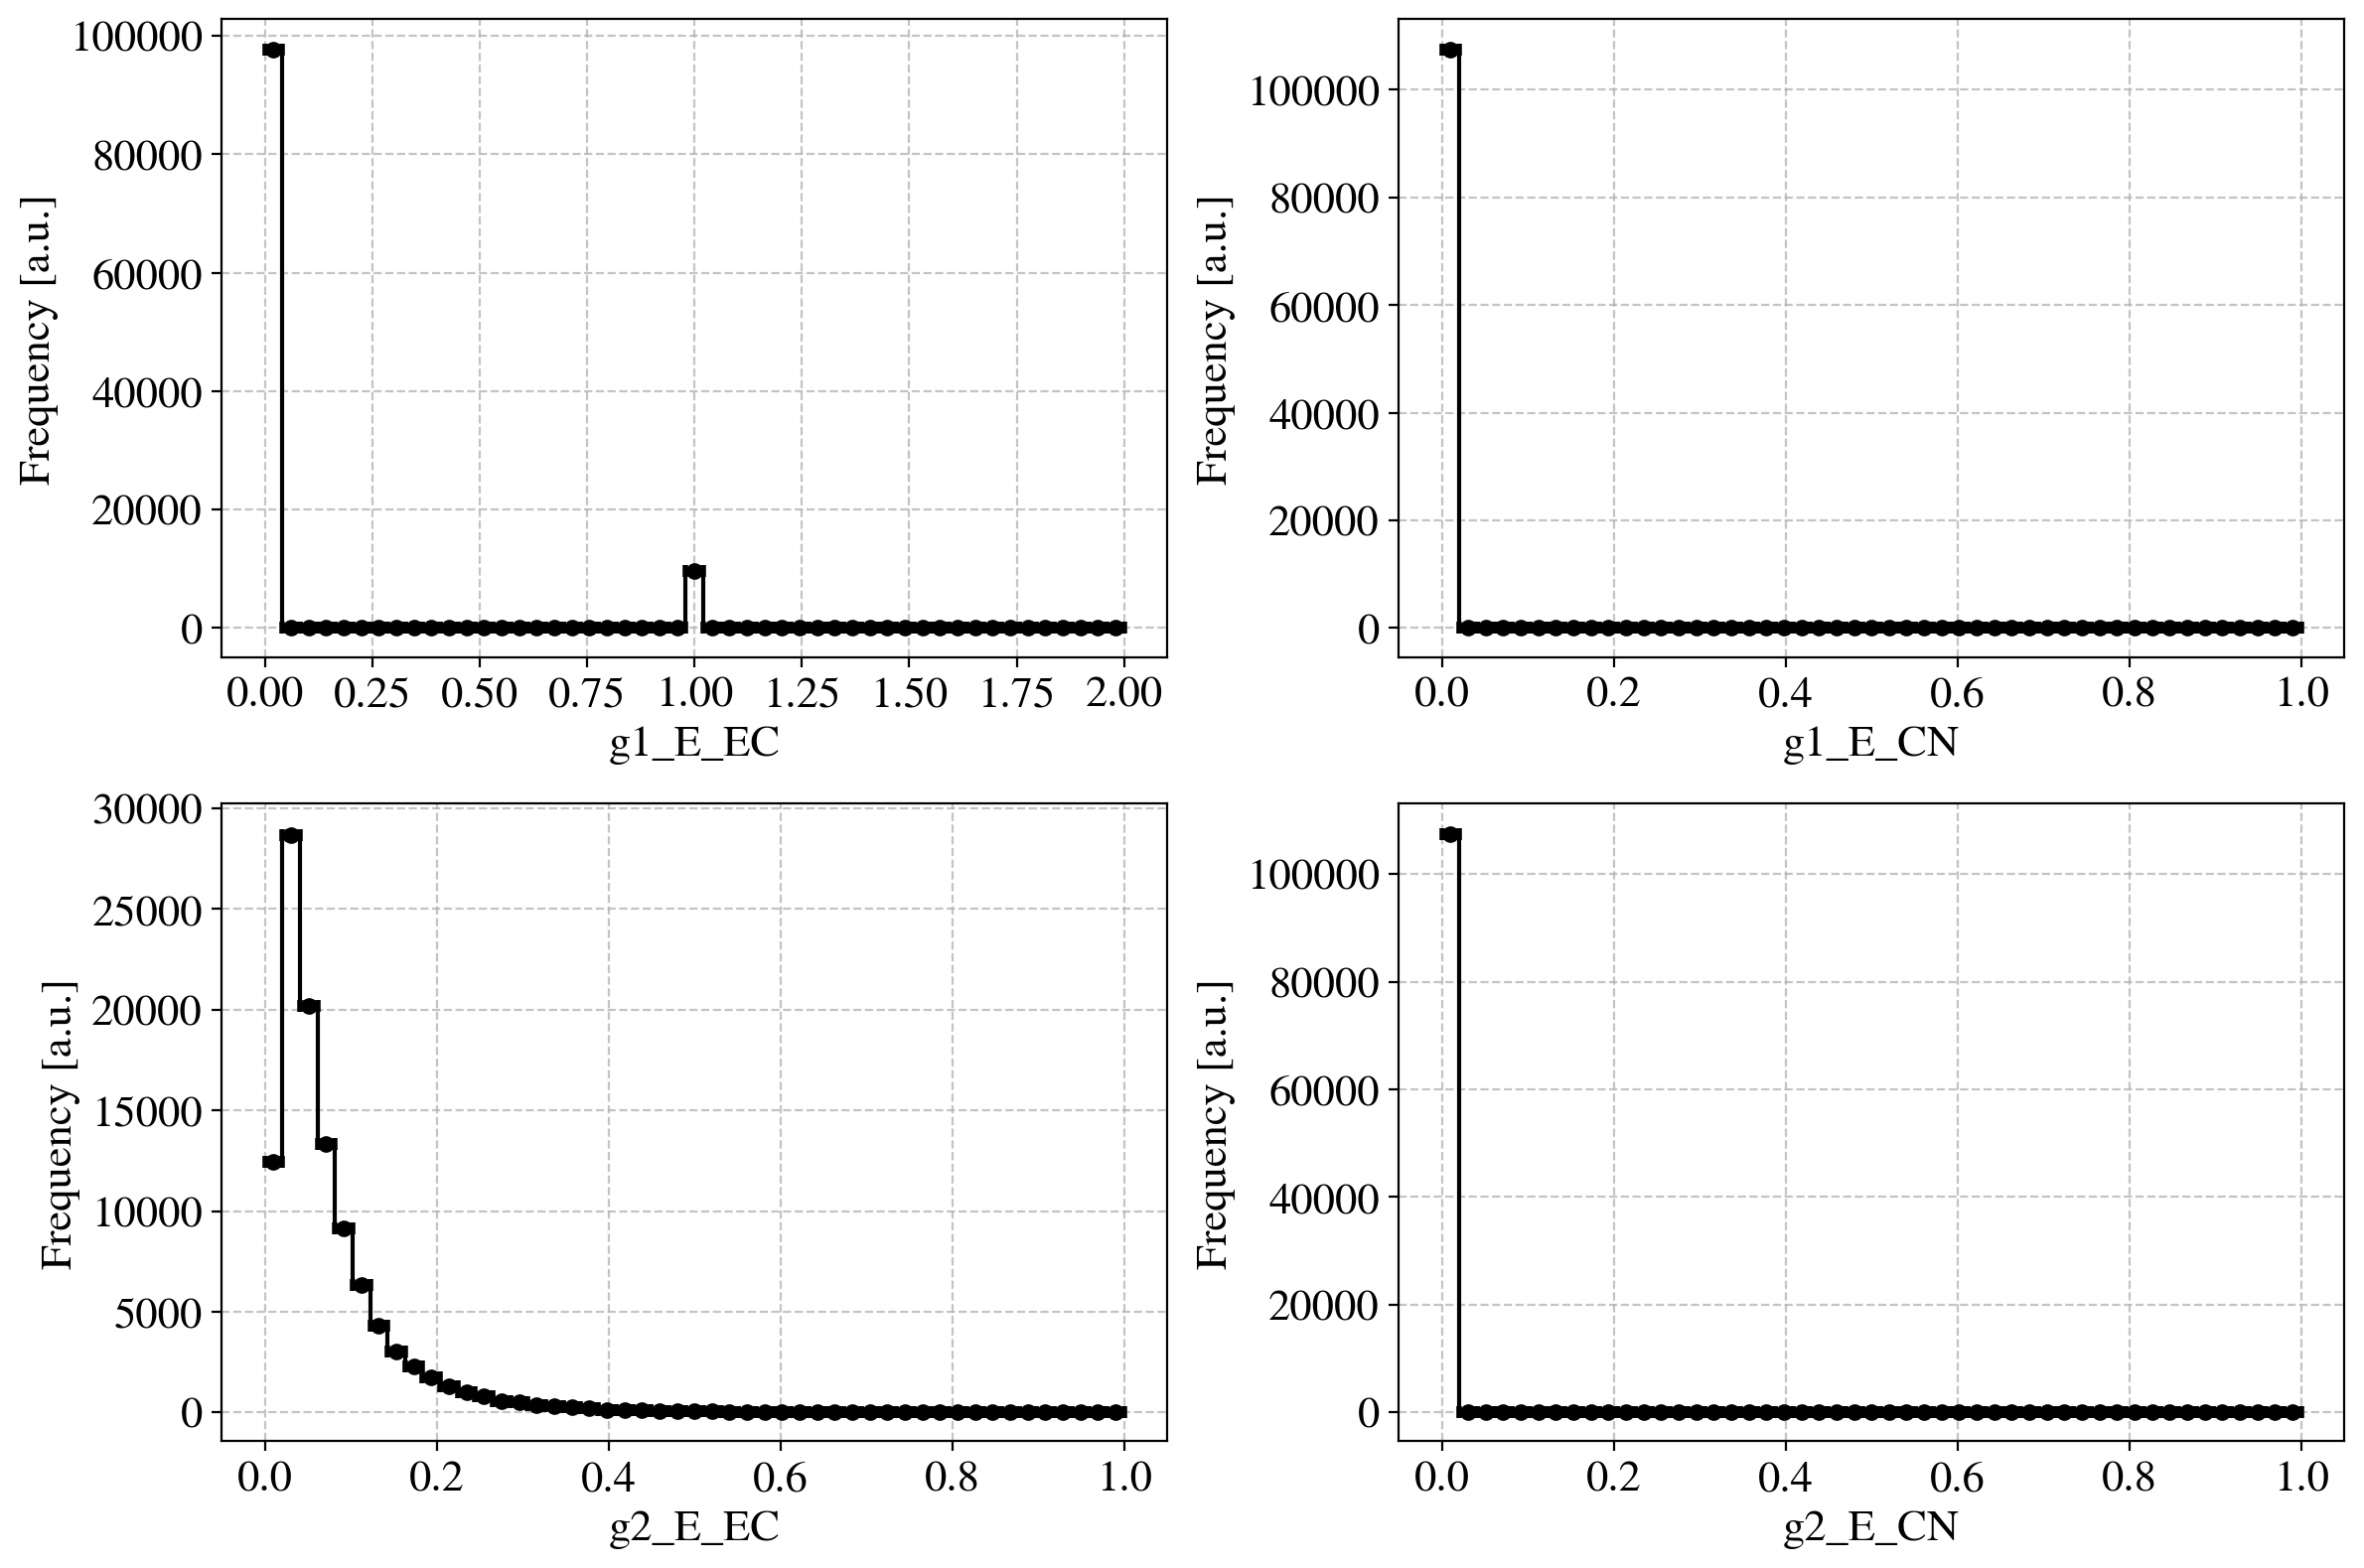

In [158]:
fig = plt.figure(figsize=(12,8),tight_layout=True)

for var,bins,i in zip(["g1_E_EC","g1_E_CN","g2_E_EC","g2_E_CN"],[np.linspace(0,2,50),np.linspace(0,1,50),np.linspace(0,1,50),np.linspace(0,1,50)],[1,2,3,4]):
    x = data_after_cuts[var]
    ax = fig.add_subplot(2,2,i)
    h = plot_step_hist(x,bins=bins);
    set_axes(ax,var,'Frequency [a.u.]',fontsize=16,do_add_grid=True);
